In [1]:
# Data commands

# python download_data.py --project=feature-recycling-final-hypers

In [2]:
import sys

sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from plotting_utils import *

sns.set_theme('notebook', 'white')
%matplotlib inline

## Load data


In [3]:
config_data_path = 'data/config_data.csv'
run_data_path = f'data/run_data.csv'
save_path = 'figures/'

raw_config_df = pd.read_csv(config_data_path, index_col=0)
raw_config_df['run_id'] = raw_config_df['id']
raw_run_df = pd.read_csv(run_data_path, index_col=0)

print('Config data:')
print(raw_config_df.columns)
display(raw_config_df.head())
print('Run data:')
print(raw_run_df.columns)
display(raw_run_df.head())


Config data:
Index(['name', 'id', 'sweep', 'seed', 'wandb', 'device', 'task.name',
       'task.type', 'model.n_layers', 'train.log_freq', 'task.n_features',
       'train.optimizer', 'train.batch_size', 'train.total_steps',
       'train.learning_rate', 'task.n_real_features',
       'idbd.meta_learning_rate', 'model.weight_init_method',
       'feature_recycling.recycle_rate', 'feature_recycling.utility_decay',
       'feature_recycling.use_cbp_utility',
       'feature_recycling.distractor_chance',
       'feature_recycling.feature_protection_steps', 'run_id'],
      dtype='object')


,name,id,sweep,seed,wandb,device,task.name,task.type,model.n_layers,train.log_freq,...,train.learning_rate,task.n_real_features,idbd.meta_learning_rate,model.weight_init_method,feature_recycling.recycle_rate,feature_recycling.utility_decay,feature_recycling.use_cbp_utility,feature_recycling.distractor_chance,feature_recycling.feature_protection_steps,run_id
0,eager-sweep-1,0p2msz1t,qi7v4uqe,0,True,cpu,linear_geoff,regression,1,100,...,0.100,10,0.01,zeros,0.5,0.999,True,0.95,100.0,0p2msz1t
1,fragrant-sweep-1,8mqag35p,u5a52er7,0,True,cpu,linear_geoff,regression,1,100,...,0.010,10,0.01,zeros,0.5,0.999,False,0.95,100.0,8mqag35p
2,visionary-sweep-1,eofadwee,t45hljp9,0,True,cpu,linear_geoff,regression,1,100,...,0.005,10,0.01,zeros,0.0,0.999,False,0.00,100.0,eofadwee
3,earthy-sweep-1,ivrcp793,xq551gtn,0,True,cpu,linear_geoff,regression,1,100,...,0.010,10,0.01,zeros,0.5,0.999,True,0.95,100.0,ivrcp793
4,leafy-sweep-1,ldpwp16s,nrqdhari,0,True,cpu,linear_geoff,regression,1,100,...,0.005,10,0.01,kaiming_uniform,0.5,0.999,True,0.95,100.0,ldpwp16s


Run data:
Index(['avg_lifespan_distractor', 'mean_weight_norm_distractor',
       'mean_learning_rate_distractor', '_runtime', 'mean_learning_rate_real',
       '_timestamp', 'loss', 'samples', 'mean_weight_norm_real', 'step',
       'num_real_features', 'num_distractor_features', 'avg_lifespan_real',
       'total_recycled_features', 'mean_utility_distractor', 'cumulative_loss',
       'mean_utility_real', 'accuracy', 'run_id'],
      dtype='object')


,avg_lifespan_distractor,mean_weight_norm_distractor,mean_learning_rate_distractor,_runtime,mean_learning_rate_real,_timestamp,loss,samples,mean_weight_norm_real,step,num_real_features,num_distractor_features,avg_lifespan_real,total_recycled_features,mean_utility_distractor,cumulative_loss,mean_utility_real,accuracy,run_id
0,0.000000,0.146767,0.1,7.099964,0.1,1.732600e+09,4.72032,0,0.36253,0,2,98,0.000000,0,0.0,4.72032,0.0,NaN,0p2msz1t
1,100.000000,NaN,NaN,7.918772,NaN,1.732600e+09,NaN,100,NaN,100,2,98,100.000000,0,NaN,NaN,NaN,NaN,0p2msz1t
2,125.187500,NaN,NaN,8.767063,NaN,1.732600e+09,NaN,200,NaN,200,4,96,120.500000,50,NaN,NaN,NaN,NaN,0p2msz1t
3,175.125000,NaN,NaN,9.461978,NaN,1.732600e+09,NaN,300,NaN,300,4,96,172.000000,100,NaN,NaN,NaN,NaN,0p2msz1t
4,230.913978,NaN,NaN,10.384750,NaN,1.732600e+09,NaN,400,NaN,400,7,93,146.428571,150,NaN,NaN,NaN,NaN,0p2msz1t


In [12]:
# Rename sweeps

sweep_rename_dict = {
    'qi7v4uqe': 'ablation_larger_lr_init',
    'xq551gtn': 'ablation_no_idbd',
    'u5a52er7': 'ablation_no_utility_metric',
    'nrqdhari': 'ablation_non_zero_weight_init',
    't45hljp9': 'no_distractors_baseline',
    'v1mxws2p': 'baseline',
    'noaeck4g': 'full_method',
    'pa398r02': 'ablation_utility_metric_off',
    '75j9cai2': 'ablation_utility_metric_on',
}

raw_config_df['sweep_name'] = raw_config_df['sweep'].map(sweep_rename_dict)

display(raw_config_df.head())

,name,id,sweep,seed,wandb,device,task.name,task.type,model.n_layers,train.log_freq,...,task.n_real_features,idbd.meta_learning_rate,model.weight_init_method,feature_recycling.recycle_rate,feature_recycling.utility_decay,feature_recycling.use_cbp_utility,feature_recycling.distractor_chance,feature_recycling.feature_protection_steps,run_id,sweep_name
0,eager-sweep-1,0p2msz1t,qi7v4uqe,0,True,cpu,linear_geoff,regression,1,100,...,10,0.01,zeros,0.5,0.999,True,0.95,100.0,0p2msz1t,ablation_larger_lr_init
1,fragrant-sweep-1,8mqag35p,u5a52er7,0,True,cpu,linear_geoff,regression,1,100,...,10,0.01,zeros,0.5,0.999,False,0.95,100.0,8mqag35p,ablation_no_utility_metric
2,visionary-sweep-1,eofadwee,t45hljp9,0,True,cpu,linear_geoff,regression,1,100,...,10,0.01,zeros,0.0,0.999,False,0.00,100.0,eofadwee,no_distractors_baseline
3,earthy-sweep-1,ivrcp793,xq551gtn,0,True,cpu,linear_geoff,regression,1,100,...,10,0.01,zeros,0.5,0.999,True,0.95,100.0,ivrcp793,ablation_no_idbd
4,leafy-sweep-1,ldpwp16s,nrqdhari,0,True,cpu,linear_geoff,regression,1,100,...,10,0.01,kaiming_uniform,0.5,0.999,True,0.95,100.0,ldpwp16s,ablation_non_zero_weight_init


## Plot only baselines and full method first

/tmp/ipykernel_1089370/3905004866.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = plot_df.groupby(['run_id', 'step_bin'], as_index=False)[['loss', 'step']].mean()


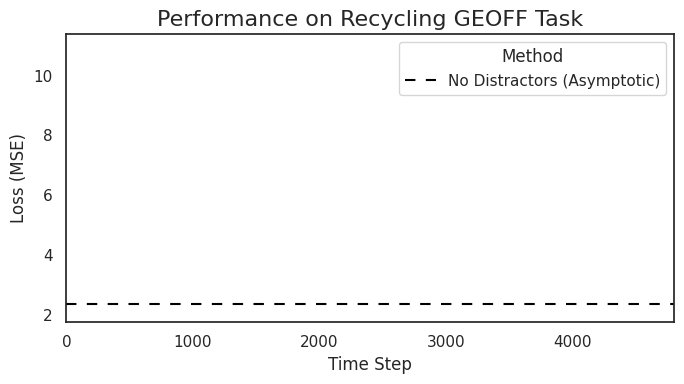

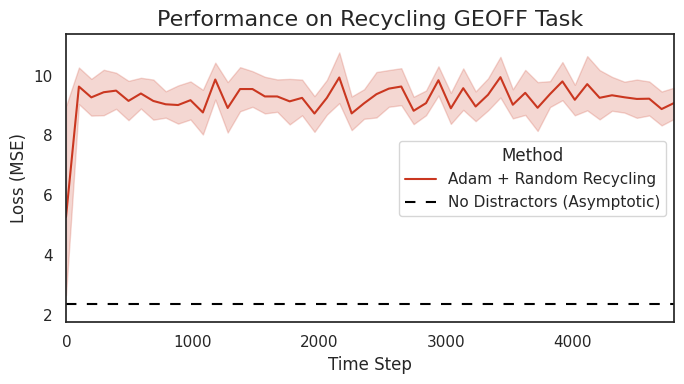

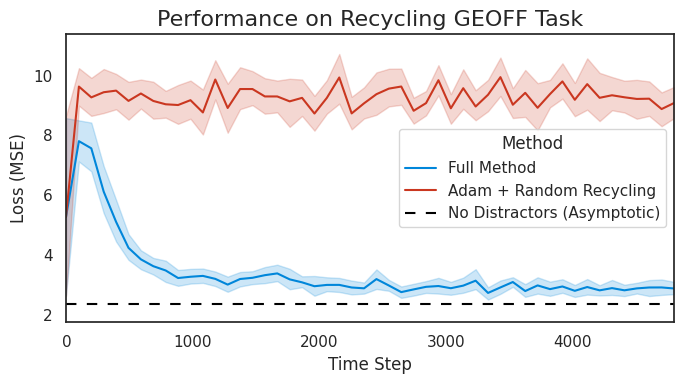


========== CONFIG (Full Method) ==========

task.name: linear_geoff
task.type: regression
model.n_layers: 1
train.log_freq: 100
task.n_features: 100
train.optimizer: idbd
train.batch_size: 1
train.total_steps: 5000
train.learning_rate: 0.01
task.n_real_features: 10
idbd.meta_learning_rate: 0.01
model.weight_init_method: zeros
feature_recycling.recycle_rate: 0.5
feature_recycling.utility_decay: 0.999
feature_recycling.use_cbp_utility: True
feature_recycling.distractor_chance: 0.95
feature_recycling.feature_protection_steps: 100.0


In [13]:
# Select only runs with baseline, full method, or no distractors baseline
plot_df = pd.merge(raw_run_df, raw_config_df[['run_id', 'sweep_name']], on='run_id')
plot_df = plot_df[plot_df['sweep_name'].isin(['baseline', 'full_method', 'no_distractors_baseline'])]

# Bin the data by time step
n_bins = 50
plot_df['step_bin'] = pd.cut(plot_df['step'], bins=n_bins)
plot_df['step_bin'] = plot_df['step_bin'].apply(lambda x: x.left)

# Calculate mean loss for each bin per run, ensuring one row per combination
plot_df = plot_df.groupby(['run_id', 'step_bin'], as_index=False)[['loss', 'step']].mean()
plot_df = pd.merge(plot_df, raw_config_df[['run_id', 'sweep_name']], on='run_id')
plot_df['sweep_name'] = plot_df['sweep_name'].replace({
    'no_distractors_baseline': 'No Distractors',
    'baseline': 'Adam + Random Recycling', 
    'full_method': 'Full Method'
})
plot_df['step_bin'] = plot_df['step_bin'].astype(int)

y_max = plot_df['loss'].quantile(0.95) * 1.05
y_min = plot_df['loss'].quantile(0.05) * 0.9

### BASELINE ONLY PLOT ###

baseline_plot_df = plot_df[plot_df['sweep_name'].isin(['No Distractors'])]
asymptotic_performance = baseline_plot_df[baseline_plot_df['step_bin'] >= 4000]['loss'].mean()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot horizontal dotted line at asymptotic performance
plt.axhline(y=asymptotic_performance, color='black', linestyle=(0, (5, 5)), label='No Distractors (Asymptotic)')

# Set bounds
plt.xlim(plot_df['step_bin'].min(), plot_df['step_bin'].max())
plt.ylim(y_min, y_max)

# Alter text
plt.title('Performance on Recycling GEOFF Task', fontsize=16)
plt.xlabel('Time Step')
plt.ylabel('Loss (MSE)')

# Adjust layout
plt.gcf().set_size_inches(7, 4)
plt.legend(title="Method")
plt.tight_layout()
plt.show()


### BOTH BASELINES PLOT ###


full_plot_df = plot_df[plot_df['sweep_name'].isin(['Adam + Random Recycling'])]

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data = full_plot_df,
    x = 'step_bin',
    y = 'loss',
    hue = 'sweep_name',
    errorbar = ('ci', 95),
    palette = get_color_palette(plot_df['sweep_name'].unique())
)
plt.axhline(y=asymptotic_performance, color='black', linestyle=(0, (5, 5)), label='No Distractors (Asymptotic)')

# Set bounds
plt.xlim(plot_df['step_bin'].min(), plot_df['step_bin'].max())
plt.ylim(y_min, y_max)
# Alter text
plt.title('Performance on Recycling GEOFF Task', fontsize=16)
plt.xlabel('Time Step')
plt.ylabel('Loss (MSE)')

# Adjust layout
plt.gcf().set_size_inches(7, 4)
plt.legend(title="Method")
plt.tight_layout()
plt.show()


### FULL PLOT ###


full_plot_df = plot_df[plot_df['sweep_name'].isin(['Adam + Random Recycling', 'Full Method'])]

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data = full_plot_df,
    x = 'step_bin',
    y = 'loss',
    hue = 'sweep_name',
    errorbar = ('ci', 95),
    palette = get_color_palette(plot_df['sweep_name'].unique())
)
plt.axhline(y=asymptotic_performance, color='black', linestyle=(0, (5, 5)), label='No Distractors (Asymptotic)')

# Set bounds
plt.xlim(plot_df['step_bin'].min(), plot_df['step_bin'].max())
plt.ylim(y_min, y_max)
# Alter text
plt.title('Performance on Recycling GEOFF Task', fontsize=16)
plt.xlabel('Time Step')
plt.ylabel('Loss (MSE)')

# Adjust layout
plt.gcf().set_size_inches(7, 4)
plt.legend(title="Method")
plt.tight_layout()
plt.show()


run_id = plot_df[plot_df['sweep_name'] == 'Full Method'].iloc[0]['run_id']
config = raw_config_df[raw_config_df['run_id'] == run_id].iloc[0]

print('\n========== CONFIG (Full Method) ==========\n')
for key, value in config.items():
    if '.' not in key:
        continue
    print(f'{key}: {value}')

/tmp/ipykernel_1089370/711548809.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = plot_df.groupby(['run_id', 'step_bin'], as_index=False)[['loss', 'step', 'num_real_features']].mean()


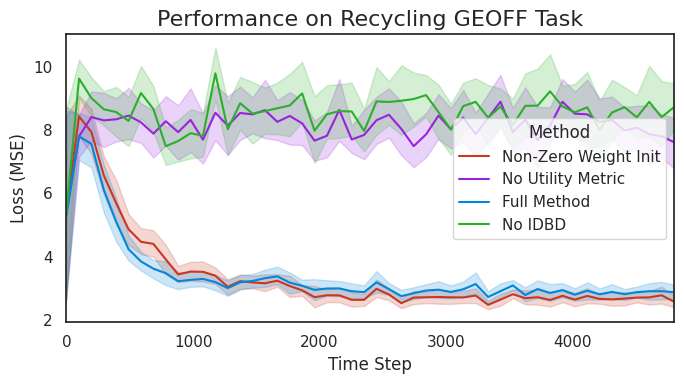

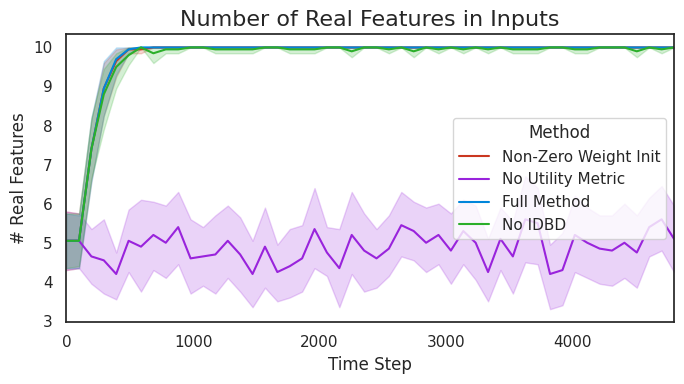


========== CONFIG (Full Method) ==========

task.name: linear_geoff
task.type: regression
model.n_layers: 1
train.log_freq: 100
task.n_features: 100
train.optimizer: idbd
train.batch_size: 1
train.total_steps: 5000
train.learning_rate: 0.01
task.n_real_features: 10
idbd.meta_learning_rate: 0.01
model.weight_init_method: zeros
feature_recycling.recycle_rate: 0.5
feature_recycling.utility_decay: 0.999
feature_recycling.use_cbp_utility: True
feature_recycling.distractor_chance: 0.95
feature_recycling.feature_protection_steps: 100.0


In [29]:

# Select only runs with baseline, full method, or no distractors baseline
plot_df = pd.merge(raw_run_df, raw_config_df[['run_id', 'sweep_name']], on='run_id')
plot_df = plot_df[plot_df['sweep_name'].isin([
    'full_method', 'ablation_no_idbd', 'ablation_non_zero_weight_init', 'ablation_no_utility_metric',
])]

# Bin the data by time step
n_bins = 50
plot_df['step_bin'] = pd.cut(plot_df['step'], bins=n_bins)
plot_df['step_bin'] = plot_df['step_bin'].apply(lambda x: x.left)

# Calculate mean loss for each bin per run, ensuring one row per combination
plot_df = plot_df.groupby(['run_id', 'step_bin'], as_index=False)[['loss', 'step', 'num_real_features']].mean()

plot_df = pd.merge(plot_df, raw_config_df[['run_id', 'sweep_name']], on='run_id')
plot_df['sweep_name'] = plot_df['sweep_name'].replace({
    'ablation_no_idbd': 'No IDBD',
    'ablation_non_zero_weight_init': 'Non-Zero Weight Init',
    'ablation_no_utility_metric': 'No Utility Metric',
    'full_method': 'Full Method',
})


### PLOT LOSS ###


# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data = plot_df,
    x = 'step_bin',
    y = 'loss',
    hue = 'sweep_name',
    errorbar = ('ci', 95),
    palette = get_color_palette(plot_df['sweep_name'].unique())
)

# Set bounds
plt.xlim(plot_df['step_bin'].min(), plot_df['step_bin'].max())

# Alter text
plt.title('Performance on Recycling GEOFF Task', fontsize=16)
plt.xlabel('Time Step')
plt.ylabel('Loss (MSE)')

# Adjust layout
plt.gcf().set_size_inches(7, 4)
plt.legend(title="Method")
plt.tight_layout()
plt.show()


### PLOT NUM REAL FEATURES ###


# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data = plot_df,
    x = 'step_bin',
    y = 'num_real_features',
    hue = 'sweep_name',
    errorbar = ('ci', 95),
    palette = get_color_palette(plot_df['sweep_name'].unique())
)

# Set bounds
plt.xlim(plot_df['step_bin'].min(), plot_df['step_bin'].max())

# Alter text
plt.title('Number of Real Features in Inputs', fontsize=16)
plt.xlabel('Time Step')
plt.ylabel('# Real Features')

# Adjust layout
plt.gcf().set_size_inches(7, 4)
plt.legend(title="Method")
plt.tight_layout()
plt.show()


run_id = plot_df[plot_df['sweep_name'] == 'Full Method'].iloc[0]['run_id']
config = raw_config_df[raw_config_df['run_id'] == run_id].iloc[0]

print('\n========== CONFIG (Full Method) ==========\n')
for key, value in config.items():
    if '.' not in key:
        continue
    print(f'{key}: {value}')

In [15]:
plot_df

,run_id,step_bin,loss,step,sweep_name
0,0eucoksc,-4.9,7.342678,0.0,Non-Zero Weight Init
1,0eucoksc,98.0,8.321663,100.0,Non-Zero Weight Init
2,0eucoksc,196.0,8.242732,200.0,Non-Zero Weight Init
3,0eucoksc,294.0,8.374009,300.0,Non-Zero Weight Init
4,0eucoksc,392.0,7.042915,400.0,Non-Zero Weight Init
...,...,...,...,...,...
3995,yjfrrr2m,4410.0,7.927883,4500.0,No IDBD
3996,yjfrrr2m,4508.0,10.553668,4600.0,No IDBD
3997,yjfrrr2m,4606.0,11.550722,4700.0,No IDBD
3998,yjfrrr2m,4704.0,10.550333,4800.0,No IDBD


In [16]:
raw_config_df['sweep_name'].unique()

array(['ablation_larger_lr_init', 'ablation_no_utility_metric',
       'no_distractors_baseline', 'ablation_no_idbd',
       'ablation_non_zero_weight_init', 'baseline', 'full_method', nan,
       'ablation_utility_metric_off', 'ablation_utility_metric_on'],
      dtype=object)

/tmp/ipykernel_1089370/4001299383.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = plot_df.groupby(['run_id', 'step_bin'], as_index=False)[['loss', 'step', 'num_real_features']].mean()



========== CONFIG (CBP Utility Metric) ==========

task.name: static_linear_geoff
task.type: regression
model.n_layers: 1
train.log_freq: 10
task.n_features: 20
train.optimizer: idbd
train.batch_size: 1
train.total_steps: 5000
train.learning_rate: 0.01
task.n_real_features: 10
idbd.meta_learning_rate: 0.005
model.weight_init_method: zeros
feature_recycling.recycle_rate: 0.01
feature_recycling.utility_decay: 0.95
feature_recycling.use_cbp_utility: True
feature_recycling.distractor_chance: 0.95
feature_recycling.feature_protection_steps: 5.0


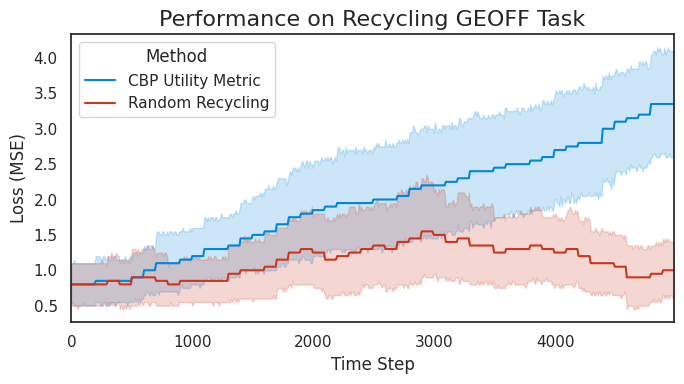

In [24]:

# Select only runs with baseline, full method, or no distractors baseline
plot_df = pd.merge(raw_run_df, raw_config_df[['run_id', 'sweep_name']], on='run_id')
plot_df = plot_df[plot_df['sweep_name'].isin([
    'ablation_utility_metric_off', 'ablation_utility_metric_on',
])]

# Bin the data by time step
n_bins = 500
plot_df['step_bin'] = pd.cut(plot_df['step'], bins=n_bins)
plot_df['step_bin'] = plot_df['step_bin'].apply(lambda x: x.left)

# Calculate mean loss for each bin per run, ensuring one row per combination
plot_df = plot_df.groupby(['run_id', 'step_bin'], as_index=False)[['loss', 'step', 'num_real_features']].mean()

plot_df = pd.merge(plot_df, raw_config_df[['run_id', 'sweep_name']], on='run_id')
plot_df['sweep_name'] = plot_df['sweep_name'].replace({
    'ablation_utility_metric_off': 'Random Recycling',
    'ablation_utility_metric_on': 'CBP Utility Metric',
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data = plot_df,
    x = 'step_bin',
    y = 'num_real_features',
    hue = 'sweep_name',
    errorbar = ('ci', 95),
    palette = get_color_palette(plot_df['sweep_name'].unique())
)

# Set bounds
plt.xlim(plot_df['step_bin'].min(), plot_df['step_bin'].max())

# Alter text
plt.title('Performance on Recycling GEOFF Task', fontsize=16)
plt.xlabel('Time Step')
plt.ylabel('Loss (MSE)')

# Adjust layout
plt.gcf().set_size_inches(7, 4)
plt.legend(title="Method")
plt.tight_layout()

run_id = plot_df[plot_df['sweep_name'] == 'CBP Utility Metric'].iloc[0]['run_id']
config = raw_config_df[raw_config_df['run_id'] == run_id].iloc[0]

print('\n========== CONFIG (CBP Utility Metric) ==========\n')
for key, value in config.items():
    if '.' not in key:
        continue
    print(f'{key}: {value}')